# <center>Principal Component Analysis(PCA)</center> 

# Table of contents
- Introduction
- Curse dimensionality
- Application of PCA
- Implementation of PCA in python

## Introduction
Principal Component Analysis(PCA) is an unsupervised Machine Learning Algorithm use for linear dimensionality reduction. It involves the extraction of information from data in high-dimensional space by projecting it into a lower-dimensional sub-space while at the same time trying to preserve the ensential parts that have  more variation of the data.

### Dimensionality
The dimension of a dataset simply corresponds to the number of features found in the dataset. Data of very high dimension makes visualization and the spotting of trends or patterns within the data very difficult and as well as interpretability of the data.

### Curse dimensionality
This is a set of problems that will arise with high dimensional data;
- For instance fitting data into a model which consist of some pair of features that are highly correlated would be like fitting the same feature but in two dimensions which is nothing but redundancy. This results to an unnecessary increase in the dimension of the data.
- Fitting high-dimensional data into a model will result to model overfitting and also an increase in training time.
- High dimension makes data visualization and spotting of patterns and trends within the data seem almost impossible.
- Distance based Machine learning algorithms such as KNN and K-Mean Clustering algorithms would not work well for high dimensional data as a lot of computation would have to be done in distance calculation.

### The Goal of PCA
To project data in high-dimensional space to data in lower-dimensional space containing the most significant features(Principal components or Dimensions) in order to make
- Visualization and spotting of patterns and trends within the data in 3D or 2D possible.
- Reduce model training time and overfitting.

### Principal Component
Principal components are simply straight lines that have magnitudes and directions.The direction indicates the principal axis accross which the data is mostly spread out while the magnitude indicate the amount of variance of data explained by the principal component.
PCs are obtained by the algebraically summing the orignal features of the dataset.

### Application of PCA
- Use to resize images
- visualization of multidimensional data
- Detect patterns and trends within multidimensional data
- Speed up the training of ML agorithms


## Dataset
The dataset used to perform PCA includeis the iris dataset

In [2]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [10]:
#Size of tha dataset

X = iris['data']
y = iris['target']
n_samples, n_features = X.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


In [13]:
#Feature names
print('Feature_names:')
print(iris.feature_names)

Feature_names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
#Dataframe containing just features
import pandas as pd
irisFeatureS_df = pd.DataFrame(X, columns = [iris.feature_names])
irisFeatureS_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
import seaborn as sns
sns.set_style('darkgrid')

<AxesSubplot:xlabel='None', ylabel='None'>

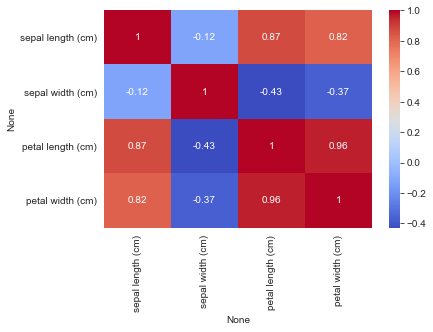

In [26]:
sns.heatmap(irisFeatureS_df.corr(), cmap = 'coolwarm',annot = True)

It could be observed from the heatmap above that 
- the sepal length and petal width,
- Sepal length and petal length,
- petal width and petal length are highly correlated

## PCA using the covariance method
The following step-by-step guide explains the general framework for computing PCA using the covariance method.

### Step1:Standardization
The features are standardized so that each of it acquires a mean of 0 and a variance of 1.

In [35]:
def  mean(x):
    return sum(x)/len(x)
def std(x):
    std = (sum((x - mean(x))**2)/len(x))**0.5
    return std
def standardized_data(x):
    return (x - mean(x))/std(x)
X_std = standardized_data(X)
    

In [39]:
X_std[:2]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

In [37]:
X_std.shape

(150, 4)

### Step 2: Determination of the covariance matrix

In [54]:
import numpy as np

In [51]:
def covariance(x): 
    return (x.T@x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

In [52]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Step 3: Determination of  the eigenvectors and eigenvalues of the covariance matrix 

In [64]:
from numpy.linalg import eig

#Decomposition of the covariance matrix to get eigen values and vectors
eig_vals,eig_vecs = eig(cov_mat)
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


### Step 4 : Sorting the Eigen Vectors and Values

In [74]:
# Creating a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i]) for i in range(len(eig_vals))]

#Sorting the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
print(eig_pairs)

[(2.9380850501999953, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624866, array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (0.147741821044948, array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (0.020853862176462217, array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


### Step 5: Chooing the principal components
The first  k eigenvectors where  k is the number of dimensions of the new feature subspace where k is less than n_features.

In [75]:
# Selecting the top k eigen vectors
k = 2
V = eig_vecs_sorted[:2]
print(V.shape)

(2, 4)


## NOTE:
The value of K could better be selected using the _explained_variance_. Explained_variance corresponds to amount of variance in the data explained by each principal component or dimension.

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


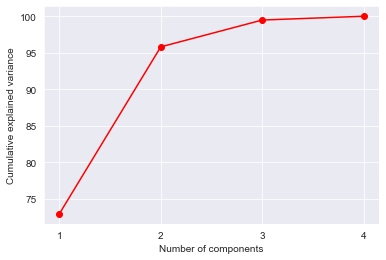

In [82]:
import matplotlib.pyplot as plt
#Determination of explained variance of each PC
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))
# visualizing the the cummulative explained variance with the number of PCs
plt.plot(np.arange(1,5), cum_explained_variance, '-o', color = 'r')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

-From the above visualization it could be observed that most of the variance about the data is explained by the first two PCs.

### Step 5: Projecting the data on to a K-th dimensional features sub-space
-  Finally we then transform the data  X via the projection matrix  V to obtain a  k dimensional feature subspace.

In [84]:
X_proj = X_std.dot(V.T)
print(X_proj.shape)

(150, 2)


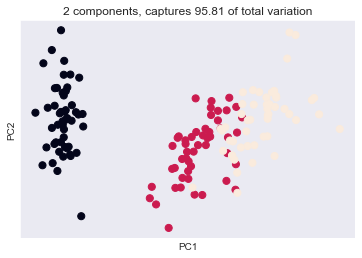

In [105]:
# Visualizing the transformed data in 2D
plt.scatter(X_proj[:,0], X_proj[:, 1], c = y,s = 50)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Putting all the steps above into a single class

In [117]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
    
    def fit(self,X):
        #Stanardize the data
        self.mean = np.mean(X, axis = 0)
        self.std = np.std(X,axis = 0)
        X_std = (X - self.mean)/self.std
        
        # Covariance matrix
        cov_mat = np.cov(X_std.T)
        
        # Decomposition of the covariance matrix to Eigen vectors and Eigen values
        eig_vals,eig_vecs = np.linalg.eig(cov_mat)
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.std
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
# ---------------------------------------------------------
pca = PCA(n_components = 2).fit(X)

print('Components:\n', pca.components)
print('Explained variance ratio from scratch:\n', pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', pca.cum_explained_variance)

X_proj = pca.transform(X)
X_proj = pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]
Explained variance ratio from scratch:
 [0.7296244541329989, 0.22850761786701754]
Cumulative explained variance from scratch:
 [0.72962445 0.95813207]
Transformed data shape from scratch: (150, 2)


### PCA with ScikitLearn

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Transformed data shape: (150, 2)


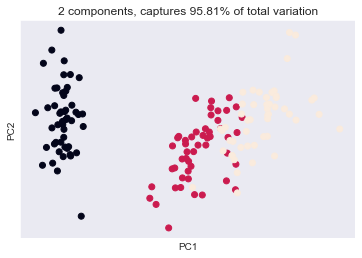

In [118]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Implement PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 ).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()

## References:
1. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
2. https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/
    